# Survey Analysis

## Q1. Import csv file and perform exploratory data analysis by identifying size of the datasets, column information and null values..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### A. Import CSV file

In [2]:
df = pd.read_csv("mxmh_survey_results.csv")
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


### B. size of the dataset

In [3]:
df.size

24288

### C. Columns Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

### D. Check for Missing Value

In [5]:
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

## Q2. Identify patterns such as age wise user data, streaming service usage category wise and how many hours per day of the users.

### A. Age-wise User Data

In [6]:
age_groups = pd.cut(
    df['Age'],
    bins=[10, 20, 30, 40, 50, 60, 70],
    labels=['10–20', '21–30', '31–40', '41–50', '51–60', '61–70']
)

age_wise_counts = df.groupby(age_groups, observed=False).size()

print("Age-wise User Distribution:\n")
print(age_wise_counts)

Age-wise User Distribution:

Age
10–20    338
21–30    247
31–40     76
41–50     26
51–60     26
61–70     15
dtype: int64


### B. streaming service usage category

In [7]:
service_usage = df['Primary streaming service'].value_counts()
print("Streaming Service Usage (Category-wise): \n")
print(service_usage)

Streaming Service Usage (Category-wise): 

Primary streaming service
Spotify                              458
YouTube Music                         94
I do not use a streaming service.     71
Apple Music                           51
Other streaming service               50
Pandora                               11
Name: count, dtype: int64


### C. how many hours per day of the users

In [8]:
avg_hours = df['Hours per day'].mean()
print("Average Listening Hours per Day (Overall)\n")
print(round(avg_hours, 2))

service_avg_hours = df.groupby('Primary streaming service')['Hours per day'].mean().sort_values(ascending=False)
print("\nAverage Listening Hours per Streaming Service \n")
print(service_avg_hours)

Average Listening Hours per Day (Overall)

3.57

Average Listening Hours per Streaming Service 

Primary streaming service
Spotify                              3.837336
Apple Music                          3.558824
YouTube Music                        3.220745
Other streaming service              2.991000
I do not use a streaming service.    2.954225
Pandora                              2.136364
Name: Hours per day, dtype: float64


## Q3. Perform co-relation analysis for the given columns and generate co-relation matrix for the same. Identify co-relation patterns of credit card spends.

### A. Correlation Matrix

In [9]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
print(corr_matrix.round(2))

                Age  Hours per day   BPM  Anxiety  Depression  Insomnia   OCD
Age            1.00          -0.04 -0.03    -0.18       -0.12      0.01 -0.13
Hours per day -0.04           1.00  0.04     0.05        0.11      0.14  0.12
BPM           -0.03           0.04  1.00    -0.03        0.04      0.05  0.02
Anxiety       -0.18           0.05 -0.03     1.00        0.52      0.29  0.35
Depression    -0.12           0.11  0.04     0.52        1.00      0.38  0.20
Insomnia       0.01           0.14  0.05     0.29        0.38      1.00  0.23
OCD           -0.13           0.12  0.02     0.35        0.20      0.23  1.00


### B. Correlation with Credit Card Spends

In [10]:
if 'Credit Card Spends' in numeric_df.columns:
    credit_corr = corr_matrix['Credit Card Spends'].sort_values(ascending=False)
    print(credit_corr.round(2))

## Q4. Identify genre wise analysis and percentage of users having effects of imporvement due to listening music.  Identify type of diseases which and its relation with music.

### A. Genre-wise User Count

In [11]:
genre_count = df['Fav genre'].value_counts()
print("Genre-wise User Count \n")
print(genre_count)

Genre-wise User Count 

Fav genre
Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
Hip hop              35
R&B                  35
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
Name: count, dtype: int64


### B. Percentage of Users Experiencing Improvement Due to Music

In [12]:
improve_count = df[df['Music effects'] == 'Improve'].shape[0]
total_users = df.shape[0]
percentage_improve = (improve_count / total_users) * 100
print("=== Percentage of Users Experiencing Improvement ===\n")
print(round(percentage_improve, 2), "%")

=== Percentage of Users Experiencing Improvement ===

73.64 %


### C. Disease-wise Analysis and Relation with Music

In [13]:
diseases = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
disease_music_relation = df.groupby('Music effects')[diseases].mean()
print("=== Disease-wise Relation with Music Effects ===\n")
print(disease_music_relation.round(2))

=== Disease-wise Relation with Music Effects ===

               Anxiety  Depression  Insomnia   OCD
Music effects                                     
Improve           6.05        4.86      3.76  2.72
No effect         5.12        4.38      3.67  2.36
Worsen            6.76        7.18      4.53  3.12


## Q5. Implement appropriate graphs for each operations.

### A. Genre-wise User Count (Bar Chart)

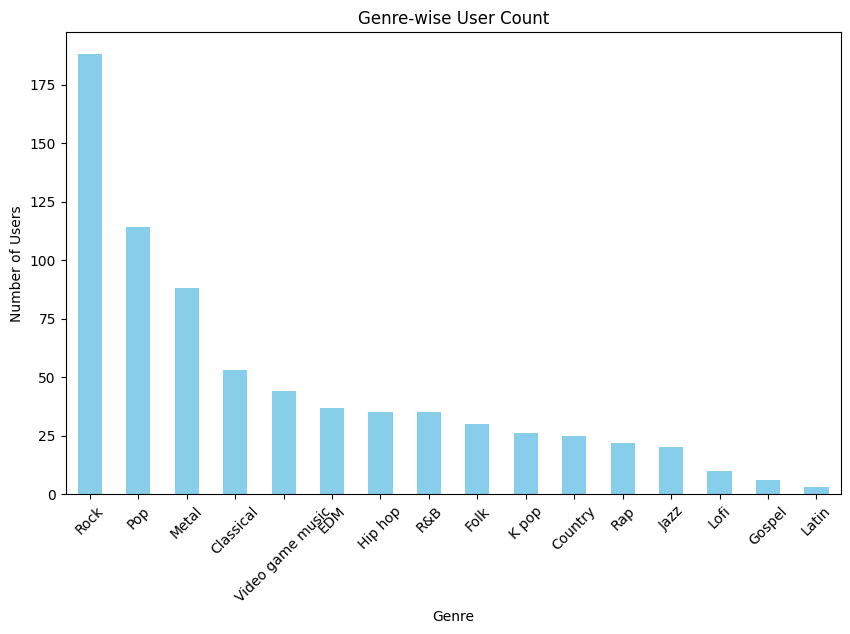

In [14]:
genre_count = df['Fav genre'].value_counts()
plt.figure(figsize=(10,6))
genre_count.plot(kind='bar', color='skyblue')
plt.title("Genre-wise User Count")
plt.xlabel("Genre")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()

### B. Percentage of Users Experiencing Improvement (Pie Chart)

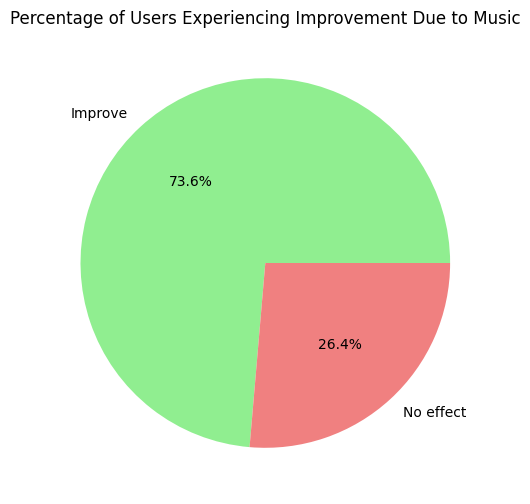

In [15]:
improve_count = df[df['Music effects'] == 'Improve'].shape[0]
no_improve_count = df.shape[0] - improve_count

plt.figure(figsize=(6,6))
plt.pie([improve_count, no_improve_count], labels=['Improve','No effect'], autopct='%1.1f%%', colors=['lightgreen','lightcoral'])
plt.title("Percentage of Users Experiencing Improvement Due to Music")
plt.show()

### C. Disease-wise Relation with Music (Heatmap)

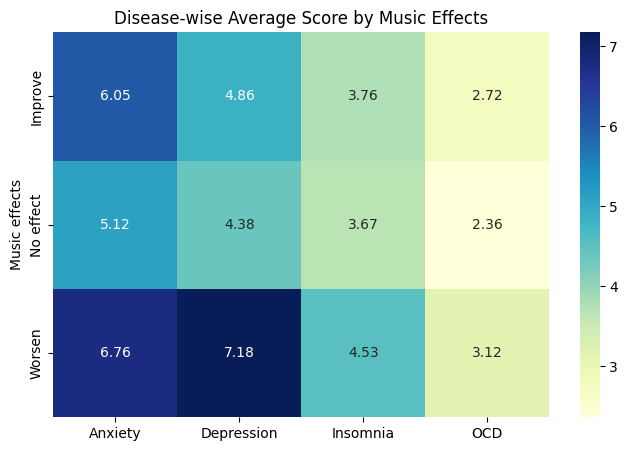

In [16]:
diseases = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
disease_music_relation = df.groupby('Music effects')[diseases].mean()

plt.figure(figsize=(8,5))
sns.heatmap(disease_music_relation, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Disease-wise Average Score by Music Effects")
plt.show()